###  모의고사2
1. 통계분석 (사용 데이터 : Admission) 
    - 피어슨상관계수
    - 회귀분석(단계선택법)
    - 잔차분석
2. 정형 데이터마이닝 (사용 데이터 : Titanic)
    - 전처리
    - 분류 (모델 3개이상)
    - ROC Curve
3. 비정형 데이터마이닝 (사용 데이터 : 문재인대통령 취임사)
    - 전처리
    - 명사출현빈도, 막대그래프
    - 워드클라우드

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
warnings.warn("once")
%matplotlib inline
#color = sns.color_palette()

# Graph 한글 표시, https://lsh-story.tistory.com/83
import matplotlib
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="./korean.ttf").get_name() #https://lsh-story.tistory.com/83
rc('font',family='AppleGothic')
matplotlib.rcParams['axes.unicode_minus'] = False


# 모의고사2 (1번), 
import statsmodels.api as sm   
from statsmodels.formula.api import ols # r 스타일 fit
from statsmodels.stats.stattools import durbin_watson # 더빈왓슨 (잔차독립성 검증)
from scipy.stats import probplot  # 잔차의 정규성 확인

print('Python:', sys.version)
print('Pandas:', pd.__version__)
print('Numpy :', np.__version__)


Python: 3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
Pandas: 0.25.1
Numpy : 1.17.2


In [2]:
def line0(title):
    # --------------------------------
    print(f'{"":->32}\n{title}\n{"":->32}') 
def line1(title):
    # --------------------------------
    print(f'{"":=>32}\n{title}\n{"":=>32}')           

# 1. 통계분석 (사용 데이터 : Admission)

### Q1) 종속변수인 chance_of_admit(입학 허가 확률)와 독립변수(GRE, TOEFL, Univ_Rating, SOP, LOR, CGPA)에 대해 피어슨 상관계수를 이용한 상관관계 분석을 수행하고 그래프를 이용하여 분석결과를 설명하시오.
* 1.1.1. 피어슨 상관분석
* 1.1.2. 상관관계 분석 그래프

### 상관분석 (Correlation Analysis)
* 변수 간의 관계의 정도를 알아보기 위한 분석방법
* 상관계수: 두 변수 간 관련성의 정도
* 1(강한 양의 관계), 0(관계 없음), -1(강한 음의 관계)
    *  0.7 ~ 1.0: 강한 양의 관계
    *  0.3 ~ 0.7: 양의 관계
    *  0.1 ~ 0.3: 약한 양의 관계
    * -0.1 ~ 0.1: 관계없음
    * -0.7 ~-1.0: 강한 음의 관계
    * -0.3 ~-0.7:     음의 관계
    * -0.1 ~-0.3: 약한 음의 관계

### 피어슨 상관계수
    * 두 연속형 자료가 정규성을 따른다는 가정 하에, 선형적 상관관계를 측정
    * 일반적으로 상관계수는 피어슨 상관계수를 의미
    * r = x,y가 함께 변하는 정도 / x,y가 각각 변하는 정도

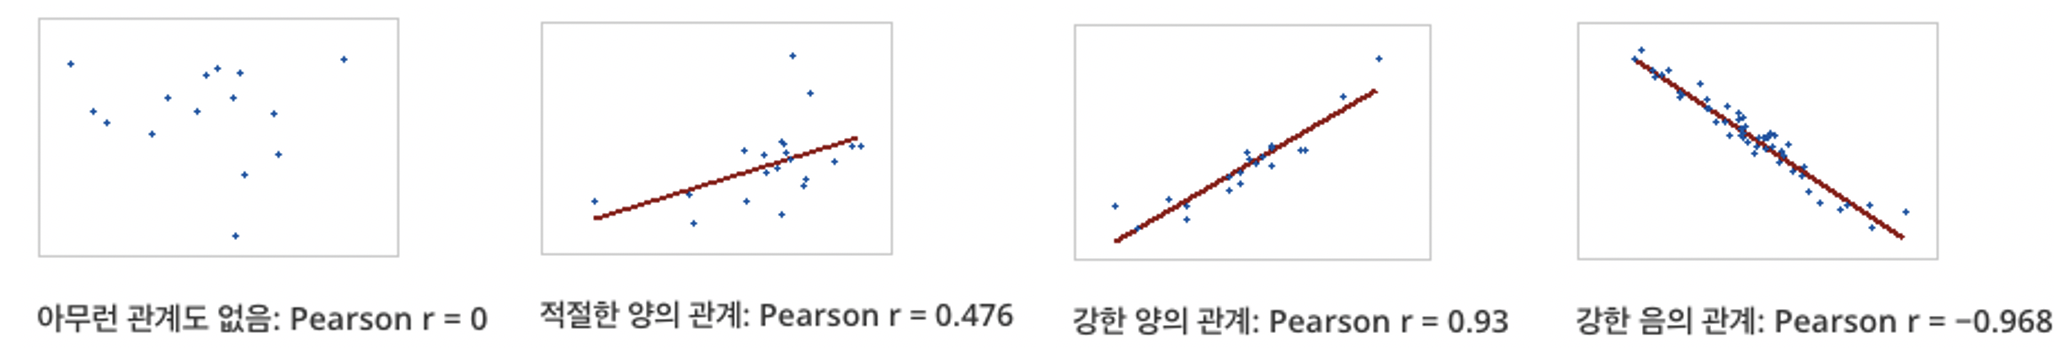

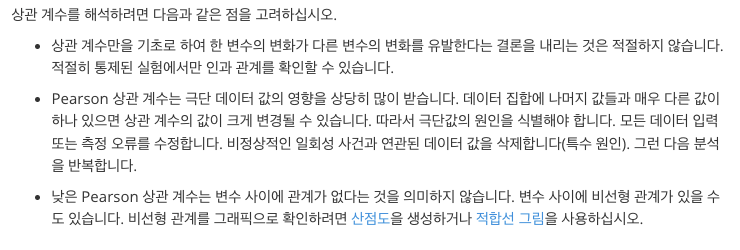

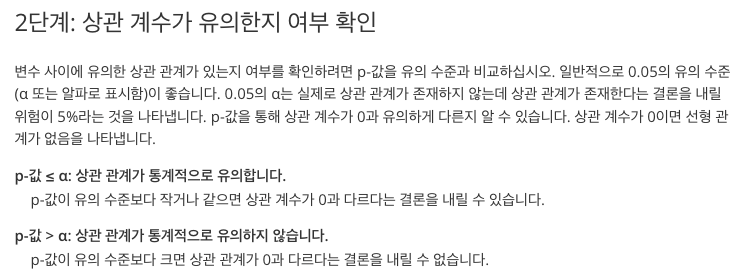

### 스피어만 상관계수
    * 두 변수가 정규성을 만족하지 않거나, 변수가 순위/순서일 때 상관관계 분석 
    * 선형, 비선형 모두 연관성 파악 가능

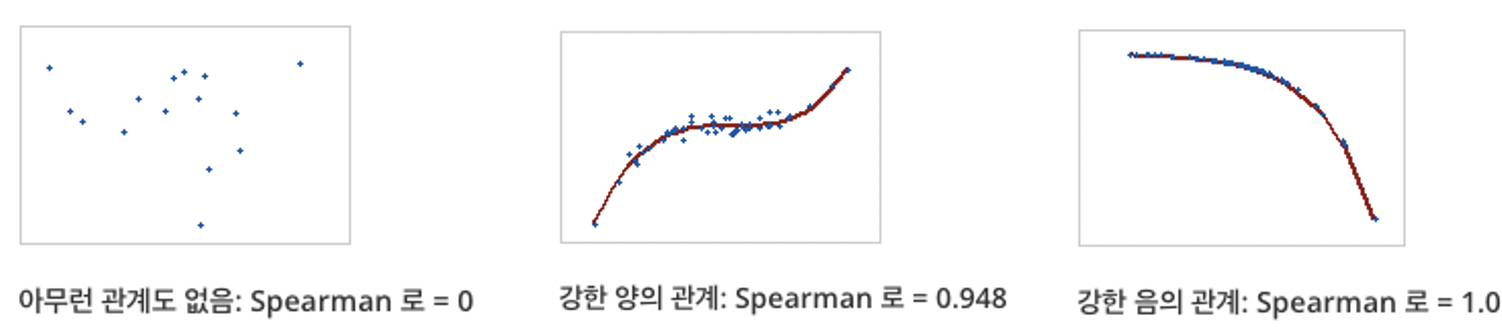

### 1.1.1. 피어슨 상관분석

In [3]:
from scipy import stats

In [4]:
df = pd.read_csv('./dataset/Admission.csv')
print(df.shape)
df

(400, 8)


,GRE,TOEFL,Univ_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [5]:
df = df.rename(columns = {'LOR ' : 'LOR'})  # 공백 있을 경우, ols분석에서 에러 발생

In [6]:
df.isna().sum().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
GRE                400 non-null int64
TOEFL              400 non-null int64
Univ_Rating        400 non-null int64
SOP                400 non-null float64
LOR                400 non-null float64
CGPA               400 non-null float64
Research           400 non-null int64
Chance_of_Admit    400 non-null float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [8]:
df.describe()

,GRE,TOEFL,Univ_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [9]:
x_list = df.columns.tolist()
x_list.remove('Research')        # 문제에서 제외 
x_list.remove('Chance_of_Admit') # 종속변수 제외
x_list

['GRE', 'TOEFL', 'Univ_Rating', 'SOP', 'LOR', 'CGPA']

In [10]:
df_cor = pd.DataFrame( columns= ['x', 'y', 'cor', 'p-value'])
df_cor['x'] = x_list
df_cor['y'] = 'Chance_of_Admit'
df_cor

,x,y,cor,p-value
0,GRE,Chance_of_Admit,NaN,NaN
1,TOEFL,Chance_of_Admit,NaN,NaN
2,Univ_Rating,Chance_of_Admit,NaN,NaN
3,SOP,Chance_of_Admit,NaN,NaN
4,LOR,Chance_of_Admit,NaN,NaN
5,CGPA,Chance_of_Admit,NaN,NaN


#### 상관분석 stats (독립변수1개 vs 종속변수)
* stats.pearsonr(x, y)   # return[0]:상관계수 [1]:p-value 
* stats.spearmanr(x, y)  # return[0]:상관계수 [1]:p-value 
* stats.kendalltau(x, y) # return[0]:상관계수 [1]:p-value 

#### 상관계수 행렬 ( 모든변수 별 상관계수)
* cor_result = df[feature_list].corr(method = 'pearson')
* cor_result = df[feature_list].corr(method = 'spearman')
* cor_result = df[feature_list].corr(method = 'kendall')

In [11]:
for i, (x,y) in enumerate(zip(df_cor['x'],df_cor['y'])): 
    val = stats.pearsonr(df[x], df[y]) #val[0]:상관계수,val[1]:p-value 
    print(val) # p-value가 너무 작아서 확인
    df_cor['cor'].loc[i]     = val[0]
    df_cor['p-value'].loc[i] = val[1]
df_cor

(0.8026104595903503, 2.4581124141787826e-91)
(0.7915939869351045, 3.6341021759970536e-87)
(0.7112502503917222, 6.635019480888702e-63)
(0.675731858388672, 1.1410946671023095e-54)
(0.6698887920106938, 2.0073145197523104e-53)
(0.8732890993553002, 2.336514000497834e-126)


,x,y,cor,p-value
0,GRE,Chance_of_Admit,0.80261,2.45811e-91
1,TOEFL,Chance_of_Admit,0.791594,3.6341e-87
2,Univ_Rating,Chance_of_Admit,0.71125,6.63502e-63
3,SOP,Chance_of_Admit,0.675732,1.14109e-54
4,LOR,Chance_of_Admit,0.669889,2.00731e-53
5,CGPA,Chance_of_Admit,0.873289,2.33651e-126


#### 결과분석
* GRE 경우, p-value는 유의수준 0.05보다 작으므로, 두 변수간의 상관관계는 통계적으로 유의하다  
  상관계수는 0.80으로 입학허가확률과 강한 양의 상관관계가 존재.  
* 나머지 변수도 동일하게 분석  
  (모든 독립변수는 종속변수와 양의 상관관계에 있고, 통계적으로 유의함을 볼 수 있다)
  

### 1.1.2. 상관관계 분석 그래프

In [12]:
feature_list = df.columns.tolist()
feature_list.remove('Research') # 문제에서 제외 
feature_list

['GRE', 'TOEFL', 'Univ_Rating', 'SOP', 'LOR', 'CGPA', 'Chance_of_Admit']

상관계수 행렬

In [13]:
cor_result = df[feature_list].corr(method = 'pearson')
cor_result

,GRE,TOEFL,Univ_Rating,SOP,LOR,CGPA,Chance_of_Admit
GRE,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.802610
TOEFL,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.791594
Univ_Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.873289
Chance_of_Admit,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,1.000000


상관계수 시각화
* pairplot은 그리드(grid) 형태로 각 데이터 열의 조합에 대해 스캐터 플롯을 그린다.  
  같은 데이터가 만나는 대각선 영역에는 해당 데이터의 히스토그램을 그린다.

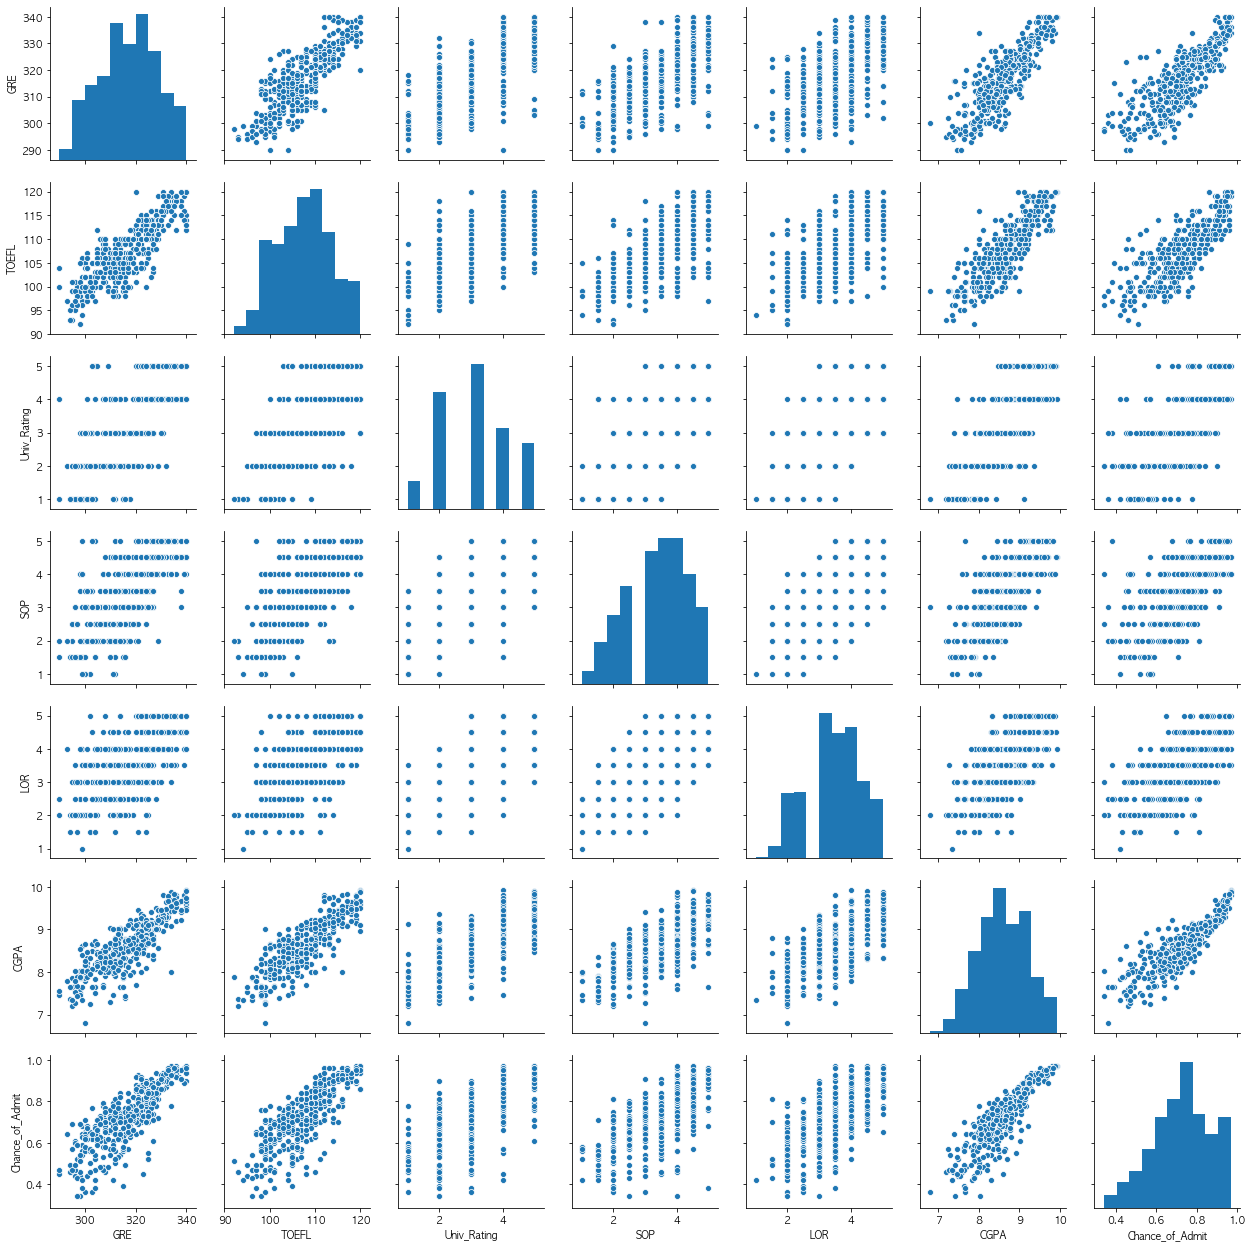

In [14]:
sns.pairplot(df[feature_list])
plt.show()

### 결과분석
* 상관계수 행렬의 숫자들은 모두 양수이며, 그래프상의 산점도가 오른쪽으로 올라가는 직선의 형태를  
  지닌 것을 보아, 서로 양의 상관관계를 가지는 것을 확인할 수 있다
  
* 다중공선성 
  * 독립변수간 강한 상관관계가 보여서 회귀계수가 불안전할 수 도 있음(일부 제거 필요)
  * https://ai-times.tistory.com/268

상관계수 히트맵

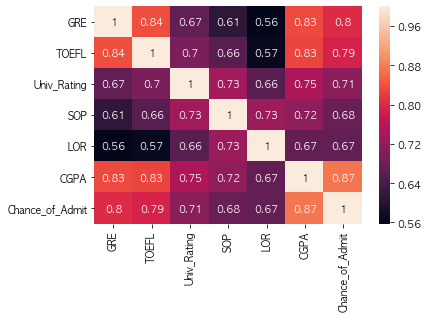

In [15]:
#plt.figure(figsize = (6,6))
ax = sns.heatmap(cor_result, annot=True)
buttom, top = ax.get_ylim()      # 위아래 잘리는 버그 해결
ax.set_ylim(buttom+0.5, top-0.5) # 위아래 잘리는 버그 해결
plt.show()


#### 결과분석 (p378)
* Admission 데이터(Research변수 제외) ~~
 

### Q2) GRE, TOEFL, Univ_Rating, SOP, LOR, CGPA, Research가 Chance_of_Admit에 
###     영향을 미치는지 알아보는 회귀분석을 단계적 선택법을 사용하여 수행하고 결과를 해석하시오.

In [16]:
import statsmodels.api as sm   
from statsmodels.formula.api import ols # r 스타일 fit

In [17]:
def get_stepwise(df_x, y, SL_in=0.05, SL_out = 0.05): # SL:유의수준
    init_list = list(df_x.columns)  # init feature list
    best_list = []                  # best feature list 
    i=0
    while (len(init_list)>0):                
        var_list = list(set(init_list)-set(best_list)) # feature_list, (set:No Index)
        pValue = pd.Series(index=var_list)             # var_list => pval의 행인덱스
        for var in var_list:                         
            model = sm.OLS(y, sm.add_constant(df_x[best_list+[var]])).fit()
            pValue[var] = model.pvalues[var]
        pValue_min = pValue.min()

        print(f'step%d'%i,'\nvar_list', var_list )
        print(f'pValue_min of var_list : {pValue.idxmin()}({np.round(pValue_min,5)})')
        i=i+1              
        if(pValue_min<SL_in):                 # pValue_min 유의할 경우
            best_list.append(pValue.idxmin()) # pValue(series조합)의 idxmin()은 var_list중 1개 원소
            while(len(best_list)>0):  
                best_list_with_constant = sm.add_constant(df_x[best_list]) 
                pValueBest = sm.OLS(y, best_list_with_constant).fit().pvalues[1:]
                pValue_max = pValueBest.max() 
                if(pValue_max >= SL_out): # pValue_Max가 0.05보다 크면, best_list에서 제거 
                    excluded_feature = pValueBest.idxmax()  # 
                    best_list.remove(excluded_feature)
                else:       # pValue_Max가 0.05보다 작으면, break 
                    print(f'pValue_max of best_list: {pValueBest.idxmax()}({np.round(pValue_max,5)})')
                    print('best_list', best_list, '\n')
                    break 
        else:  # p_value가 유의하지 않으면(0.05보다 작으면) break
            print(f'\nBreak(pValue_min > 0.05)')
            print(f'best_list = {best_list}')
            break
    return best_list 

x_list

In [18]:
x_list = df.columns.tolist()
x_list.remove('Chance_of_Admit') # 종속변수 제외
x_list

['GRE', 'TOEFL', 'Univ_Rating', 'SOP', 'LOR', 'CGPA', 'Research']

df_x

In [19]:
df_x = df[x_list]
print(df_x.shape)
df_x.head(2)

(400, 7)


,GRE,TOEFL,Univ_Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1


y

In [20]:
y = df['Chance_of_Admit'].values
print(y.shape)
y[:5]

(400,)


array([0.92, 0.76, 0.72, 0.8 , 0.65])

best_list (변수선택법)

In [21]:
# get_stepwise
best_list = get_stepwise(df_x, y, SL_in=0.05, SL_out = 0.05)
best_list

step0 
var_list ['GRE', 'LOR', 'CGPA', 'Univ_Rating', 'TOEFL', 'Research', 'SOP']
pValue_min of var_list : CGPA(0.0)
pValue_max of best_list: CGPA(0.0)
best_list ['CGPA'] 

step1 
var_list ['GRE', 'LOR', 'SOP', 'Univ_Rating', 'TOEFL', 'Research']
pValue_min of var_list : GRE(0.0)
pValue_max of best_list: GRE(0.0)
best_list ['CGPA', 'GRE'] 

step2 
var_list ['LOR', 'SOP', 'Univ_Rating', 'TOEFL', 'Research']
pValue_min of var_list : LOR(0.0)
pValue_max of best_list: LOR(0.0)
best_list ['CGPA', 'GRE', 'LOR'] 

step3 
var_list ['TOEFL', 'Research', 'Univ_Rating', 'SOP']
pValue_min of var_list : Research(0.003)
pValue_max of best_list: Research(0.003)
best_list ['CGPA', 'GRE', 'LOR', 'Research'] 

step4 
var_list ['TOEFL', 'Univ_Rating', 'SOP']
pValue_min of var_list : TOEFL(0.00465)
pValue_max of best_list: TOEFL(0.00465)
best_list ['CGPA', 'GRE', 'LOR', 'Research', 'TOEFL'] 

step5 
var_list ['Univ_Rating', 'SOP']
pValue_min of var_list : Univ_Rating(0.2857)

Break(pValue_min > 0.05)
best

['CGPA', 'GRE', 'LOR', 'Research', 'TOEFL']

#### 결과분석 (p380)
* 변수선택법을 사용하여 CGPA, GRE, LOR, Research, TOEFL이 선택되었다.

In [22]:
model = ols('Chance_of_Admit ~ GRE + TOEFL + LOR + CGPA + Research ', df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance_of_Admit   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     320.6
Date:                Thu, 30 Sep 2021   Prob (F-statistic):          2.04e-136
Time:                        22:58:58   Log-Likelihood:                 536.61
No. Observations:                 400   AIC:                            -1061.
Df Residuals:                     394   BIC:                            -1037.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2985      0.117    -11.070      0.000      -1.529      -1.068
GRE            0.0018      0.001      2.992      0.003       0.001       0.003
TOEFL          0.0030      0.001      2.847      0.005       0.001       0.005
LOR            0.0228      0.005      4.741      0.000       0.013       0.032
CGPA           0.1210      0.012     10.312      0.000       0.098       0.144
Research       0.0246      0.008      3.103      0.002       0.009       0.040
==============================================================================
Omnibus:                       87.489   Durbin-Watson:                   0.750
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.337
Skew:                          -1.157   Prob(JB):                     1.14e-39
Kurtosis:                       5.325   Cond. No.                     1.23e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 결과분석 (p381)
- GRE, TOEFL, Research는 유의수준 0.01하, LOR, CGPA는 유의수준 0.001하에서 통계적으로 유의하다
- 모형은 y = -1.2985 + 0.0018*GRE + 0.0030*TOEFL + 0.0228*LOR + 0.1210*CGPA + 0.0246*Research
- 모형의 수정된 결정계수는 0.80이다. (Adj. R-squared)
    - 즉, 다변량 회귀식은 전체 데이터의 80%를 설명하고 있다.
- F통계량(320.6)의 p-value(Prob)은 유의수준 0.05보다 작음으로 모형이 통계적으로 유의하다.
- 입학준비생들은 성공적인 입학을 위해서 CGPA, Resarch, CGPA를 더욱 신경써서 준비해야 한다.

### 3) 단계 선택법을 사용해 변수를 선택한 후 새롭게 생성한 회귀모형에 대한  잔차분석을  수행하고,  
### 그래프를 활용하여 결과를 해석하시오. 
    * 회귀모형은 분석데이터가 선형성, 독립성, 등분산성, 정규성의 가정을 만족하지 않으면 
      제대로 된 선형회귀모델을 생성할 수 없다. 
      잔차의 독립성, 정규성, 등분산성을 만족하는지 봐야한다. 
    1.3.1 잔차의 독립성
    1.3.2 잔차의 정규성
    1.3.3 잔차의 등분산성



### 1.3.1 잔차의 독립성
* Durbin-Watson으로 독립성 검증 
    - 2에 가까울수록 자기상관이 없음
    - 0에 가까우면 양의 상관관계
    - 4에 가까우면 음의 상관관계



In [23]:
from statsmodels.stats.stattools import durbin_watson # 더빈왓슨 (잔차독립성 검증)

방법1 - durbin_watson

In [24]:
durbin_watson(model.resid)

0.7499111207304134

#### 결과분석 (p382)
* (독립성x) Durbin-Watson 검정 결과값이 0.75로 0에 가깝기 때문에 독립성 가정을 만족한다고 보기 어렵다  
    - 2에 가까울수록 자기상관이 없음
    - 0에 가까우면 양의 상관관계
    - 4에 가까우면 음의 상관관계

방법2 - model.summary2 (Durbin-Watson항목있음)

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance_of_Admit   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     320.6
Date:                Thu, 30 Sep 2021   Prob (F-statistic):          2.04e-136
Time:                        22:58:58   Log-Likelihood:                 536.61
No. Observations:                 400   AIC:                            -1061.
Df Residuals:                     394   BIC:                            -1037.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2985      0.117    -11.070      0.000      -1.529      -1.068
GRE            0.0018      0.001      2.992      0.003       0.001       0.003
TOEFL          0.0030      0.001      2.847      0.005       0.001       0.005
LOR            0.0228      0.005      4.741      0.000       0.013       0.032
CGPA           0.1210      0.012     10.312      0.000       0.098       0.144
Research       0.0246      0.008      3.103      0.002       0.009       0.040
==============================================================================
Omnibus:                       87.489   Durbin-Watson:                   0.750
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.337
Skew:                          -1.157   Prob(JB):                     1.14e-39
Kurtosis:                       5.325   Cond. No.                     1.23e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### 결과분석 (p382)
* (독립성x) Durbin-Watson 검정 결과값이 0.75로 0에 가깝기 때문에 독립성 가정을 만족한다고 보기 어렵다

### 1.3.2 잔차의 정규성
* 정규성 검정은 말 그대로 정규 분포를 따르는지를 검정하는 방법


방법1. Nomal Q-Q plot

In [26]:
from scipy.stats import probplot  # 잔차의 정규성 확인

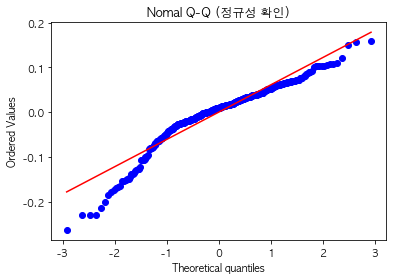

In [27]:
plt.figure()
probplot(model.resid, plot=plt)
plt.title('Nomal Q-Q (정규성 확인)')
plt.show()

#### 결과분석 (p383)
* (정규성x) 대각선에 벗어난 점이 많아서 잔차가 정규성을 만족한다고 보기 힘들다

방법2. 샤피로(Shapiro)

In [28]:
stats.shapiro(model.resid)  # [0]검정통계량 [1] p-value

(0.9219251275062561, 1.4429574885215651e-13)

#### 결과분석
* (정규성x) Shapiro-Wilk 검정 결과 p-value가 1.443e-13으로 유의수준 0.05하에서 귀무가설을 기각한다.  
  따라서 admission데이터는 정규분포를 따른다고 보기 어렵다


### 1.3.3 잔차의 등분산성

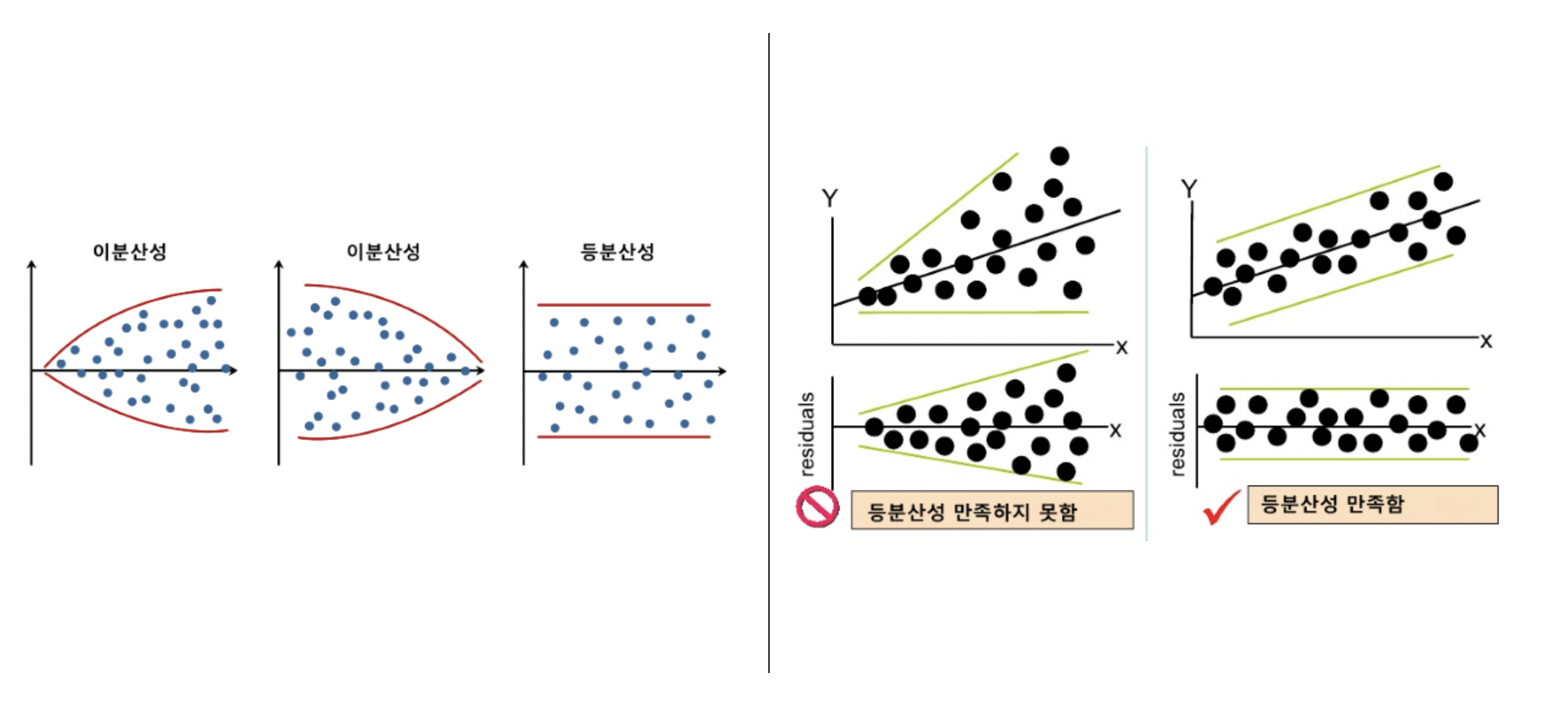

In [29]:
best_list

['CGPA', 'GRE', 'LOR', 'Research', 'TOEFL']

In [30]:
y_pred = model.predict(df[best_list])
residual = df['Chance_of_Admit'] - y_pred

방법1. Residuals vs Fitted(y_pred)

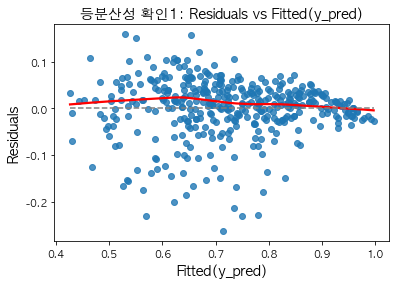

In [31]:
sns.regplot(y_pred, residual, lowess=True, line_kws= {'color':'red'})
plt.title("등분산성 확인1: Residuals vs Fitted(y_pred)", fontsize=14)
plt.xlabel("Fitted(y_pred)", fontsize=14) 
plt.ylabel("Residuals", fontsize=14)
plt.plot([y_pred.min(), y_pred.max()], [0,0], '--', color = 'grey')

#### 결과분석(p383)
* 위 그래프는 예측값(X축)에 따라 잔차가 어떻게 달라지는지 보여준다.
* 실선이 수평선에 가까울수록 등분산성이 있다는 것이다. 
* 그래프의 기울기가 직선 성향, 평균인 0을 중심으로 고르게 분포(등분산성 만족)

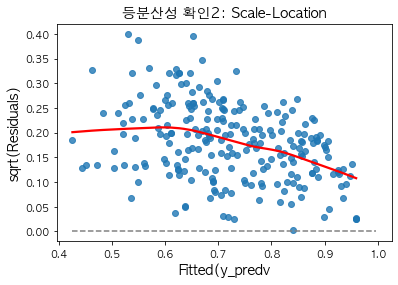

In [32]:
sns.regplot(y_pred, np.sqrt(residual), lowess=True, line_kws= {'color':'red'})
plt.title("등분산성 확인2: Scale-Location", fontsize=14)
plt.xlabel("Fitted(y_predv", fontsize=14) 
plt.ylabel("sqrt(Residuals)", fontsize=14)
plt.plot([y_pred.min(), y_pred.max()], [0,0], '--', color = 'grey')

#### 결과분석(p383)
* (등분산성x) 빨간선 기울기가 0에 가까워야 하지만 Fitted Value가 증가할수록 기울기가 줄어드는 경향
* 기울기가 0에서 떨어진 점이 있다면 표준화 잔차가 커서 회귀직선이 y값을 잘 적합하지 못함을 의미  
  (또한 해당 점들은 이상치일 가능성 있음)

# 2. 정형 데이터마이닝 (사용 데이터 : Titanic)

### Q1) cabib, embarked변수의 값 중 ""로 처리된 값을 NA로 바꾸고 아래의 데이터 테이블을 보고 
###     문자형, 범주형 변수들을 각각 character, factor형으로 변환하시오.
###     또, 수치형 변수가 NA인 값을 중앙값으로 대체하고, 범주형 변수가 NA인 값을 최빈값으로 대체하고
###     age변수를 아래의 표와 같이 구간화하여 age_1이라는 변수를 생성하고 추가하시오. 
    * 2.1.1 cabib, embarked변수의 값 중 ""로 처리된 값을 NA로 변경
    * 2.1.2 문자형, 범주형 변수들을 각각 character, factor형으로 변환
    * 2.1.3 수치형 변수가 NA인 값을 중앙값으로 대체하고, 범주형 변수가 NA인 값을 최빈값으로 대체
    * 2.1.4 age변수를 아래의 표와 같이 구간화하여 age_1이라는 변수를 생성하고 추가

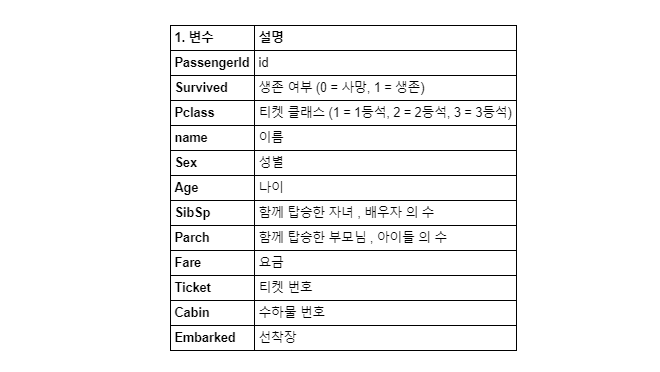

EDA

In [33]:
df = pd.read_csv('./dataset/titanic.csv')
print(df.shape)
df.head()

(1309, 11)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S


In [34]:
df.isna().sum()

pclass         0
survived       0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
pclass      1309 non-null int64
survived    1309 non-null int64
name        1309 non-null object
sex         1309 non-null object
age         1046 non-null float64
sibsp       1309 non-null int64
parch       1309 non-null int64
ticket      1309 non-null object
fare        1308 non-null float64
cabin       295 non-null object
embarked    1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [36]:
df.describe()

,pclass,survived,age,sibsp,parch,fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [37]:
df['survived'].value_counts()  # 종속변수, 0:사망자, 1:생존자

0    809
1    500
Name: survived, dtype: int64

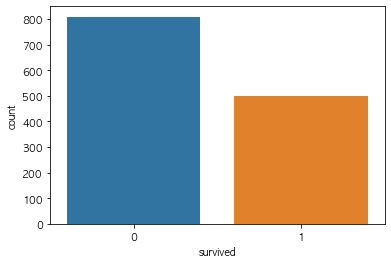

In [38]:
sns.countplot(df['survived'])

### 2.1.1 cabin(선실번호), embarked(탑승장소) 변수의 값 중 ""로 처리된 값을 NA로 변경
* python에서는 별도로 ""->NA 변경 불필요
    * python에서 csv의 공백은 nan으로 읽힘  
     (r은 csv의 공백이 ""로 읽혀지는 것 같음)

In [39]:
df.isna().sum()  # cabin:1014, embarked:2

pclass         0
survived       0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
dtype: int64

In [40]:
df.cabin.unique() # nan 있음. 7번째

array(['B5', 'C22 C26', 'E12', 'D7', 'A36', 'C101', nan, 'C62 C64', 'B35',
       'A23', 'B58 B60', 'D15', 'C6', 'D35', 'C148', 'C97', 'B49', 'C99',
       'C52', 'T', 'A31', 'C7', 'C103', 'D22', 'E33', 'A21', 'B10', 'B4',
       'E40', 'B38', 'E24', 'B51 B53 B55', 'B96 B98', 'C46', 'E31', 'E8',
       'B61', 'B77', 'A9', 'C89', 'A14', 'E58', 'E49', 'E52', 'E45',
       'B22', 'B26', 'C85', 'E17', 'B71', 'B20', 'A34', 'C86', 'A16',
       'A20', 'A18', 'C54', 'C45', 'D20', 'A29', 'C95', 'E25', 'C111',
       'C23 C25 C27', 'E36', 'D34', 'D40', 'B39', 'B41', 'B102', 'C123',
       'E63', 'C130', 'B86', 'C92', 'A5', 'C51', 'B42', 'C91', 'C125',
       'D10 D12', 'B82 B84', 'E50', 'D33', 'C83', 'B94', 'D49', 'D45',
       'B69', 'B11', 'E46', 'C39', 'B18', 'D11', 'C93', 'B28', 'C49',
       'B52 B54 B56', 'E60', 'C132', 'B37', 'D21', 'D19', 'C124', 'D17',
       'B101', 'D28', 'D6', 'D9', 'B80', 'C106', 'B79', 'C47', 'D30',
       'C90', 'E38', 'C78', 'C30', 'C118', 'D36', 'D48', 'D47', '

In [41]:
df.embarked.unique()

array(['S', 'C', nan, 'Q'], dtype=object)

####  분석
* python에서는 별도로 ""->NA 변경 불필요
* python에서 csv의 공백은 nan으로 읽힘
    * r은 csv의 공백이 ""로 읽혀지는 것 같음
* df.isna().sum() 으로 열별 NaN 갯수 확인

### 2.1.2 문자형, 범주형 변수들을 각각 character, factor형으로 변환
* https://teddylee777.github.io/kaggle/kaggle(%EC%BA%90%EA%B8%80)-Titanic-%EC%83%9D%EC%A1%B4%EC%9E%90%EC%98%88%EC%B8%A1-81-%EC%9D%B4%EC%83%81-%EB%8B%AC%EC%84%B1%ED%95%98%EA%B8%B0* 

In [42]:
df.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
pclass      1309 non-null int64
survived    1309 non-null int64
name        1309 non-null object
sex         1309 non-null object
age         1046 non-null float64
sibsp       1309 non-null int64
parch       1309 non-null int64
ticket      1309 non-null object
fare        1308 non-null float64
cabin       295 non-null object
embarked    1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [44]:
df['pclass'] = df['pclass'].astype('category')
df['survived'] = df['survived'].astype('category')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
pclass      1309 non-null category
survived    1309 non-null category
name        1309 non-null object
sex         1309 non-null object
age         1046 non-null float64
sibsp       1309 non-null int64
parch       1309 non-null int64
ticket      1309 non-null object
fare        1308 non-null float64
cabin       295 non-null object
embarked    1307 non-null object
dtypes: category(2), float64(2), int64(2), object(5)
memory usage: 94.9+ KB


#### 분석
* df.info()통해서 object가 category가 적용이 안 되어 있음을 확인.  
  이들을 astype('category')를 통해 범주화로 변환하였고 df.info()로 변환됨을 확인.

### 2.1.3 수치형 변수가 NA인 값을 중앙값으로 대체하고, 범주형 변수가 NA인 값을 최빈값으로 대체

In [46]:
df.isna().sum()

pclass         0
survived       0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
dtype: int64

In [47]:
df.describe()

,age,sibsp,parch,fare
count,1046.000000,1309.000000,1309.000000,1308.000000
mean,29.881138,0.498854,0.385027,33.295479
std,14.413493,1.041658,0.865560,51.758668
min,0.170000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,14.454200
75%,39.000000,1.000000,0.000000,31.275000
max,80.000000,8.000000,9.000000,512.329200


In [48]:
median_age    =  df.age.median()   # df.info의 50%와 동일
median_fare   =  df.fare.median() 
mode_cabin    =  df.cabin.mode()[0]    # type이 object일 경우 [0]적용
mode_embarked =  df.embarked.mode()[0] # type이 object일 경우 [0]적용
print(median_age)
print(median_fare)
print(mode_cabin)
print(mode_embarked)
df['age']      = df['age' ]    .fillna( median_age   ) 
df['fare']     = df['fare']    .fillna( median_fare  ) 
df['cabin']    = df['cabin' ]  .fillna( mode_cabin   )      
df['embarked'] = df['embarked'].fillna( mode_embarked)

28.0
14.4542
C23 C25 C27
S


In [49]:
df.isna().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
cabin       0
embarked    0
dtype: int64

#### 분석
* df.isna().sum()를 통해서 열별 Nan 갯수를 확인하였고, median(), mode()을 통해서  
  중앙값, 최빈값을 만들어서 nan값을 대체하였다.  
* df.isna().sum()으로 nan값이 없음을 알 수 있다.

### 2.1.4 age변수를 아래의 표와 같이 구간화하여 age_1이라는 변수를 생성하고 추가
* 범주, 범위
* 0, 00이상 10미만
* 1, 10이상 20미만
* ...
* 8, 80이상 90미만

In [50]:
df.loc[((df['age'] >= 0)  & (df['age'] < 10)), 'age_1'] = 0
df.loc[((df['age'] >= 10) & (df['age'] < 20)), 'age_1'] = 1
df.loc[((df['age'] >= 20) & (df['age'] < 30)), 'age_1'] = 2
df.loc[((df['age'] >= 30) & (df['age'] < 40)), 'age_1'] = 3
df.loc[((df['age'] >= 40) & (df['age'] < 50)), 'age_1'] = 4
df.loc[((df['age'] >= 50) & (df['age'] < 60)), 'age_1'] = 5
df.loc[((df['age'] >= 60) & (df['age'] < 70)), 'age_1'] = 6
df.loc[((df['age'] >= 70) & (df['age'] < 80)), 'age_1'] = 7
df.loc[((df['age'] >= 80) & (df['age'] < 90)), 'age_1'] = 8

print(df.shape)
df.head()

(1309, 12)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,age_1
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2.0
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,0.0
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,0.0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,3.0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,2.0


In [51]:
df.age_1.value_counts()

2.0    607
3.0    232
1.0    143
4.0    135
0.0     82
5.0     70
6.0     32
7.0      7
8.0      1
Name: age_1, dtype: int64

#### 해석 
* 'age'열에 조건을 적용하여 age_1을 생성하였고, head함수로 age_1이 추가됨을 확인함

### Q2) 전처리가 완료된 titanic 데이터를 train(70%), test(30%) 데이터로 분할하시오.
###    (set.seed(12345)를 실행한 후 데이터를 분할하시오.) 
###    또, train 데이터로 종속변수인 survived(생존 여부)를 독립변수 pclass, sex, sibsp, parch, 
###    fare, embarked로 지정하여 예측하는 분류모델을 3개 이상 생성하고 test 데이터에 대한 
###    예측값을 csv파일로 각각 제출하시오.
* https://mjs1995.tistory.com/62
* https://github.com/minsuk-heo/kaggle-titanic/blob/master/titanic-solution.ipynb
    * 2.2.1 data split (7:3)
    * 2.2.2 pred, csv

### 2.2.1 data split (7:3)

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
np.random.seed(12345)

In [54]:
df.columns.to_list()

['pclass',
 'survived',
 'name',
 'sex',
 'age',
 'sibsp',
 'parch',
 'ticket',
 'fare',
 'cabin',
 'embarked',
 'age_1']

In [55]:
x_list =  ['pclass', 'sex', 'sibsp', 'parch',  'fare',  'embarked'] 
df_x = df[x_list]
df_y = df['survived']

print(df_x.shape)
print(df_y.shape)
display( df_x.head())
df_y.head()

(1309, 6)
(1309,)


,pclass,sex,sibsp,parch,fare,embarked
0,1,female,0,0,211.3375,S
1,1,male,1,2,151.5500,S
2,1,female,1,2,151.5500,S
3,1,male,1,2,151.5500,S
4,1,female,1,2,151.5500,S


0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: category
Categories (2, int64): [0, 1]

In [56]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 6 columns):
pclass      1309 non-null category
sex         1309 non-null object
sibsp       1309 non-null int64
parch       1309 non-null int64
fare        1309 non-null float64
embarked    1309 non-null object
dtypes: category(1), float64(1), int64(2), object(2)
memory usage: 52.6+ KB


In [57]:
df_x = pd.get_dummies(df_x)
display(df_x.info())
df_x.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
sibsp         1309 non-null int64
parch         1309 non-null int64
fare          1309 non-null float64
pclass_1      1309 non-null uint8
pclass_2      1309 non-null uint8
pclass_3      1309 non-null uint8
sex_female    1309 non-null uint8
sex_male      1309 non-null uint8
embarked_C    1309 non-null uint8
embarked_Q    1309 non-null uint8
embarked_S    1309 non-null uint8
dtypes: float64(1), int64(2), uint8(8)
memory usage: 41.0 KB


None

,sibsp,parch,fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0,0,211.3375,1,0,0,1,0,0,0,1
1,1,2,151.5500,1,0,0,0,1,0,0,1
2,1,2,151.5500,1,0,0,1,0,0,0,1
3,1,2,151.5500,1,0,0,0,1,0,0,1
4,1,2,151.5500,1,0,0,1,0,0,0,1


In [58]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.3, random_state = 6789)
print(x_train.shape, y_train.shape)
print(x_test.shape, x_test.shape)

(916, 11) (916,)
(393, 11) (393, 11)


#### 분석
* np.random.seed로 sample값이 동일하게 추출 하도록 적용
* train_test_split으로 train/test를 7:3를 분할하고 shape을 통해 분할결과를 확인
* 종속변수와 독립변수(pclass,....)를 추출하여 dataset을구축하고 info()로 구조를 파악

### 2.2.2 pred, csv

In [59]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from glob import glob

In [60]:
# conda install -c conda-forge xgboost  # for mac
# conda install -c conda-forge lightgbm # for mac
# !pip install xgboost
# !pip install lightgbm

In [61]:
from sklearn.linear_model   import LogisticRegression
from sklearn.ensemble       import RandomForestClassifier
from sklearn.tree           import DecisionTreeClassifier
from sklearn.naive_bayes    import GaussianNB
from sklearn.neighbors      import KNeighborsClassifier
from sklearn.svm            import SVC
from sklearn.neural_network import MLPClassifier

from lightgbm               import LGBMClassifier
from xgboost                import XGBClassifier

# 추가할 것 
# - 배깅, 부스팅

In [62]:
def get_yPred_metrics(model, x_train, y_train, x_test, y_test, title):
    line1(f'Model: {title}')
    print(f'x_train{x_train.shape}, y_train{y_train.shape}')
    print(f'x_test{x_test.shape},  y_test{y_test.shape}')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'y_pred{y_pred.shape}')
    
    print('\nconfusion_matrix')
    print(confusion_matrix(y_test, y_pred))    
    print('\nclassification_report')
    print(classification_report(y_test, y_pred))

    return pd.DataFrame(y_pred)

In [63]:
lr = LogisticRegression()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
nb = GaussianNB()
kn = KNeighborsClassifier()
sv = SVC()
lg = LGBMClassifier()
xg = XGBClassifier()

In [64]:
lr_pred = get_yPred_metrics(lr, x_train, y_train, x_test, y_test, 'LogisticRegression' )
rf_pred = get_yPred_metrics(rf, x_train, y_train, x_test, y_test, 'RandomForestClassifier')
dt_pred = get_yPred_metrics(dt, x_train, y_train, x_test, y_test, 'DecisionTreeClassifier')
nb_pred = get_yPred_metrics(nb, x_train, y_train, x_test, y_test, 'GaussianNB')
kn_pred = get_yPred_metrics(kn, x_train, y_train, x_test, y_test, 'KNeighborsClassifier')
sv_pred = get_yPred_metrics(sv, x_train, y_train, x_test, y_test, 'SVC')
lg_pred = get_yPred_metrics(lg, x_train, y_train, x_test, y_test, 'LGBMClassifier')
xg_pred = get_yPred_metrics(xg, x_train, y_train, x_test, y_test, 'XGBClassifier')

Model: LogisticRegression
x_train(916, 11), y_train(916,)
x_test(393, 11),  y_test(393,)
y_pred(393,)

confusion_matrix
[[207  34]
 [ 53  99]]

classification_report
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       241
           1       0.74      0.65      0.69       152

    accuracy                           0.78       393
   macro avg       0.77      0.76      0.76       393
weighted avg       0.78      0.78      0.78       393

Model: RandomForestClassifier
x_train(916, 11), y_train(916,)
x_test(393, 11),  y_test(393,)
y_pred(393,)

confusion_matrix
[[207  34]
 [ 62  90]]

classification_report
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       241
           1       0.73      0.59      0.65       152

    accuracy                           0.76       393
   macro avg       0.75      0.73      0.73       393
weighted avg       0.75      0.76      0.75       393

Model: Dec

In [65]:
print(type(lr_pred))
lr_pred

<class 'pandas.core.frame.DataFrame'>


,0
0,0
1,0
2,0
3,0
4,1
...,...
388,1
389,1
390,0
391,1


In [66]:
lr_pred.to_csv('./output/모의고사2_lr_pred.csv')
rf_pred.to_csv('./output/모의고사2_rf_pred.csv')
dt_pred.to_csv('./output/모의고사2_dt_pred.csv')
nb_pred.to_csv('./output/모의고사2_nb_pred.csv')
kn_pred.to_csv('./output/모의고사2_kn_pred.csv')
sv_pred.to_csv('./output/모의고사2_sv_pred.csv')
xg_pred.to_csv('./output/모의고사2_xg_pred.csv')
lg_pred.to_csv('./output/모의고사2_lg_pred.csv')
sorted(glob('./output/모의고사2*'))

['./output/모의고사2_dt_pred.csv',
 './output/모의고사2_kn_pred.csv',
 './output/모의고사2_lg_pred.csv',
 './output/모의고사2_lr_pred.csv',
 './output/모의고사2_nb_pred.csv',
 './output/모의고사2_rf_pred.csv',
 './output/모의고사2_sv_pred.csv',
 './output/모의고사2_xg_pred.csv']

#### 분석 (p390, p391)
* lr
* rf
* dt

### Q3) 생성된 3개의 분류모델에 대해 성과분석을 실시하여 정확도를 비교하여 설명하시오. 
###     또, ROC curve를 그리고 AUC값을 산출하시오.

In [67]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

In [68]:
def plot_roc(y_test, y_pred):
    plt.rcParams["axes.grid"] = True  # grid on/off
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)    
    plt.plot(fpr, tpr, label = 'ROC 곡선')
    plt.plot([0,1], [0,1], 'k--')
    plt.title('ROC Curve')
    plt.xlabel('FPR', fontsize=12)
    plt.ylabel('TPR (재현율)', fontsize=12)
    plt.show()
    

In [69]:
def get_accuracy_roc_auc(model, x_train, y_train, x_test, y_test, title):
    line1(f'Model: {title}')
    model.fit(x_train, y_train)    # fit
    y_pred = model.predict(x_test) # predict       
    
    accuracy = accuracy_score(y_test, y_pred) # accuracy
    auc = roc_auc_score(y_test, y_pred) # auc
    print(f' > accuracy = {accuracy}') 
    print(f' > auc = {auc}')        
    plot_roc(y_test, y_pred)    # roc_curve  

In [70]:
lr = LogisticRegression()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
nb = GaussianNB()
kn = KNeighborsClassifier()
sv = SVC()
lg = LGBMClassifier()
xg = XGBClassifier()

Model: LogisticRegression
 > accuracy = 0.7786259541984732
 > auc = 0.7551184756497051


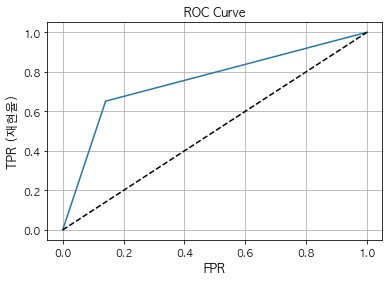

Model: RandomForestClassifier
 > accuracy = 0.7480916030534351
 > auc = 0.7180743612142388


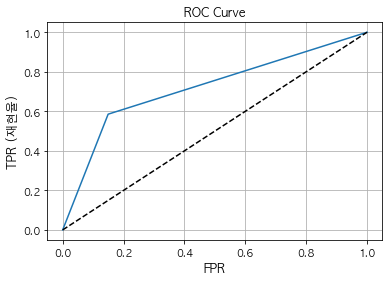

Model: DecisionTreeClassifier
 > accuracy = 0.7684478371501272
 > auc = 0.7443901506879231


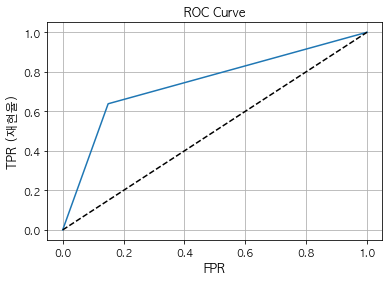

Model: GaussianNB
 > accuracy = 0.7709923664122137
 > auc = 0.7622570430224941


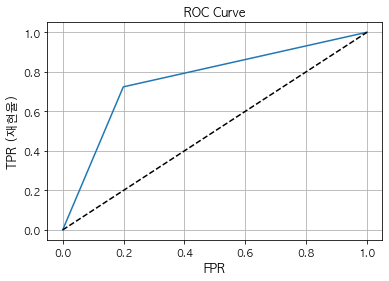

Model: KNeighborsClassifier
 > accuracy = 0.7608142493638677
 > auc = 0.7478843633981219


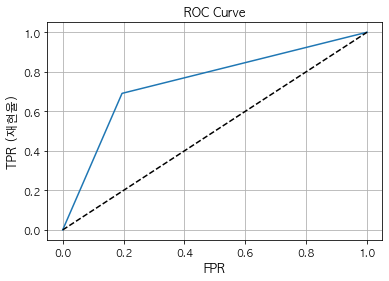

Model: SVC
 > accuracy = 0.7760814249363868
 > auc = 0.7615472810657348


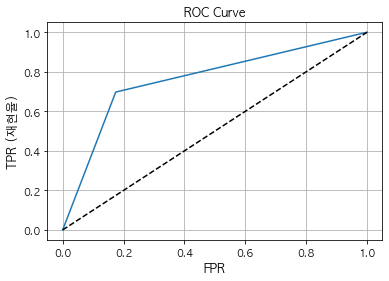

Model: xg
 > accuracy = 0.7938931297709924
 > auc = 0.7542039746669579


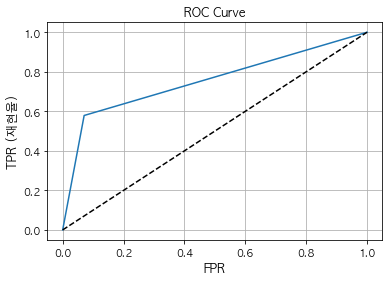

Model: lg
 > accuracy = 0.7862595419847328
 > auc = 0.7564834024896265


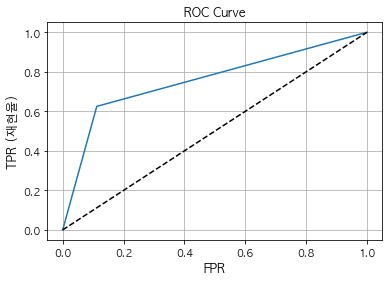

In [71]:
get_accuracy_roc_auc(lr, x_train, y_train, x_test, y_test, 'LogisticRegression')
get_accuracy_roc_auc(rf, x_train, y_train, x_test, y_test, 'RandomForestClassifier')
get_accuracy_roc_auc(dt, x_train, y_train, x_test, y_test, 'DecisionTreeClassifier')
get_accuracy_roc_auc(nb, x_train, y_train, x_test, y_test, 'GaussianNB')
get_accuracy_roc_auc(kn, x_train, y_train, x_test, y_test, 'KNeighborsClassifier')
get_accuracy_roc_auc(sv, x_train, y_train, x_test, y_test, 'SVC')
get_accuracy_roc_auc(xg, x_train, y_train, x_test, y_test, 'xg')
get_accuracy_roc_auc(lg, x_train, y_train, x_test, y_test, 'lg')

####  분석
* lr
* rf
* dt

# 3. 비정형 데이터마이닝 (사용 데이터 : 문재인대통령 취임사)

### 1) ‘연설문.txt’ 데이터를 읽어온 뒤 숫자, 특수 문자 등을 제거하는 전처리 작업을 시행하시오.

In [72]:
# text, 모의고사 2-3
import konlpy  # !pip install konlpy
import re
from sklearn.feature_extraction.text import CountVectorizer # text 인스턴스 생성

In [73]:
# 숫자/특수문자 제거
def get_textReSub(path):
    print('[step1] file open, read')
    file = open(path, 'r', encoding='cp949')
    print('file:',type(file))
    string = file.read()
    print('string:',type(string), len(string))
    print('string[:100]')
    print(string[:100])
    
    print('\n[step2] split string by \ n')    
    line = string.split('\n')
    print('line:',type(line), len(line))
    print(line[:10])
    
    print('\n[step3] list to Series ')      
    text = pd.Series(line)
    print('text',type(text),text.shape)
    print('text[:10]', text[:10])
    
    print('\n[step4] 특수/숫자 제거 ')        
    # re.sub(find, replace, data) 패턴문자대체
    # https://jdh5202.tistory.com/394
    text = text.map(lambda x: re.sub(r"\d", " ", x))  # r"\d", r은 \d를 문자 그대로 인식
    text = text.map(lambda x: re.sub("!!", " ", x))  # r"\d", r은 \d를 문자 그대로 인식
    text_clean = text.map(lambda x: re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》;]', ' ', x))
    print('text_clean[:10]')
    print(text_clean[:10])

    return text_clean  

In [74]:
path = './dataset/연설문.txt'
text = get_textReSub(path)

[step1] file open, read
file: <class '_io.TextIOWrapper'>
string: <class 'str'> 1924
string[:100]
존경하고 사랑하는 국민 여러분, 감사합니다.
국민 여러분의 위대한 선택에 머리 숙여 깊이 감사드립니다. 저는 오늘 대한민국 제19대 대통령으로서 새로운 대한민국을 향해 첫걸음을 내

[step2] split string by \ n
line: <class 'list'> 31
['존경하고 사랑하는 국민 여러분, 감사합니다.', '국민 여러분의 위대한 선택에 머리 숙여 깊이 감사드립니다. 저는 오늘 대한민국 제19대 대통령으로서 새로운 대한민국을 향해 첫걸음을 내딛습니다. 지금 제 두 어깨는 국민 여러분으로부터 부여받은 막중한 소명감으로 무겁습니다. 지금 제 가슴은 한번도 경험하지 못한 나라를 만들겠다는 열정으로 뜨겁습니다. 그리고 지금 제 머리는 통합과 공존의 새로운 세상을 열어갈 청사진으로 가득 차 있습니다.', '', '우리가 만들어가려는 새로운 대한민국은 숱한 좌절과 패배에도 불구하고 우리의 선대들이 일관되게 추구했던 나라입니다. 또 많은 희생과 헌신을 감내하며 우리 젊은이들이 그토록 이루고 싶어 했던 나라입니다. 그런 대한민국을 만들기 위해 저는 역사와 국민 앞에 두렵지만 겸허한 마음으로 대한민국 제19대 대통령으로서의 책임과 소명을 다할 것임을 천명합니다.', '', '함께 선거를 치른 후보들께 감사의 말씀과 심심한 위로를 전합니다. 이번 선거에서는 승자도 패자도 없습니다. 우리는 새로운 대한민국을 함께 이끌어가야 할 동반자입니다. 이제 치열했던 경쟁의 순간을 뒤로하고 함께 손을 맞잡고 앞으로 전진해야 합니다.', '', '존경하는 국민 여러분,', '지난 몇 달 우리는 유례없는 정치적 격변기를 보냈습니다. 정치는 혼란스러웠지만 국민은 위대했습니다. 현직 대통령의 탄핵과 구속 앞에서도 국민들이 대한민국의 앞길을 열어주셨습니다. 우리 국민들은 좌절하지 않고 오히려 이를 전화위복의 계

#### 분석
* 전처리 시행 후 쓸모없는 빈칸이나 대문자, 구두점, 숫자, 공백이 제거 되었음을 확인할 수 있다.  
* 그리고 이를 text변수 저장하였다.

### 2) 전처리된 데이터에서 명사를 추출하고 명사의 출현빈도를 10위까지 추출하여 막대그래프로 시각화하시오.

In [75]:
# WordCloud
from konlpy.tag import Komoran  # No JVM shared 에러 -> https://www.azul.com/downloads
from collections import Counter # 단어 Count
from wordcloud import WordCloud # !pip install wordcloud

In [76]:
# kormoran:형태소분석기, ex) kormoran.get_nouns(str) 명사만 추출
komoran = Komoran()  

In [77]:
def get_wordsFromText(text, komoran):
    # Step1. text -> string
    print('[Step1] text -> string')
    print('text:',text.shape) # (1791,)
    string = ' '.join(text[:])   # 1791단어(text)를 ' '로 붙여서 1개 str생성, ex) ['a','b','c'] => 'a b c'
    print('string:', type(string), len(string))
    print('string[:200]',string[:300])
    
    # Step2. string-> 명사 추출
    print('\n[Step2] string-> 명사 추출')
    nouns = komoran.nouns(string) 
    print('nouns',type(nouns),len(nouns))
    print('nouns[:10]',nouns[:10])

    # Step3. 명사 발생빈도추출(Counter), df.gropby(df['nouns']).count()
    print('\n[Step3] 명사별 발생빈도 목록 추출(Counter)')
    cnt = Counter(nouns) # cnt.most_common(10)  => 많이 발생한것, 내림차순 정렬
    print('cnt', type(cnt), len(cnt))
    print('cnt[:10]', list(cnt)[:10])
    
    # Step4. 많이 발생한 단어 30개 추출
    print('\n[Step4] 많이 발생한 단어 30개 추출')
    noun_list = cnt.most_common(30)
    print('noun_list',type(noun_list))
    print('noun_list[:10]', noun_list[:10])
    # df_noun
    df_noun = pd.DataFrame(noun_list, columns = ['명사', '빈도']) # 처리편의성 위해 df로 변경
    print('df_noun.head(10)')
    display(df_noun.head(10))
        
    # Setp5. 2음절 이상만 추출
    print('\n[Step5] 2음절 이상만 추출')    
    df_noun = df_noun[ df_noun['명사'].str.len() >=2 ]
    print('df_noun.head(10)')
    display(df_noun.head(10))    
    
    # Step6. WordCloud 입력형태인 dict로 변경 
    print('\n[Step6] WordCloud 입력형태인 dict로 변경 ')        
    words = dict(df_noun.values)    
    print('words', type(words), len(words))
    print('words[:10]', list(words.items())[:10])
    return words, df_noun  

In [78]:
wordDict, df_noun = get_wordsFromText(text, komoran)    

[Step1] text -> string
text: (31,)
string: <class 'str'> 1924
string[:200] 존경하고 사랑하는 국민 여러분  감사합니다  국민 여러분의 위대한 선택에 머리 숙여 깊이 감사드립니다  저는 오늘 대한민국 제  대 대통령으로서 새로운 대한민국을 향해 첫걸음을 내딛습니다  지금 제 두 어깨는 국민 여러분으로부터 부여받은 막중한 소명감으로 무겁습니다  지금 제 가슴은 한번도 경험하지 못한 나라를 만들겠다는 열정으로 뜨겁습니다  그리고 지금 제 머리는 통합과 공존의 새로운 세상을 열어갈 청사진으로 가득 차 있습니다   우리가 만들어가려는 새로운 대한민국은 숱한 좌절과 패배에도 불구하고 우리의 선대들이 일관되게 추구했던

[Step2] string-> 명사 추출
nouns <class 'list'> 260
nouns[:10] ['존경', '사랑', '국민', '여러분', '감사', '국민', '선택', '머리', '감사', '오늘']

[Step3] 명사별 발생빈도 목록 추출(Counter)
cnt <class 'collections.Counter'> 165
cnt[:10] ['존경', '사랑', '국민', '여러분', '감사', '선택', '머리', '오늘', '대한민국', '대']

[Step4] 많이 발생한 단어 30개 추출
noun_list <class 'list'>
noun_list[:10] [('국민', 19), ('대통령', 15), ('대한민국', 8), ('나라', 6), ('오늘', 4), ('정치', 4), ('존경', 3), ('여러분', 3), ('감사', 3), ('머리', 3)]
df_noun.head(10)


,명사,빈도
0,국민,19
1,대통령,15
2,대한민국,8
3,나라,6
4,오늘,4
5,정치,4
6,존경,3
7,여러분,3
8,감사,3
9,머리,3



[Step5] 2음절 이상만 추출
df_noun.head(10)


,명사,빈도
0,국민,19
1,대통령,15
2,대한민국,8
3,나라,6
4,오늘,4
5,정치,4
6,존경,3
7,여러분,3
8,감사,3
9,머리,3



[Step6] WordCloud 입력형태인 dict로 변경 
words <class 'dict'> 26
words[:10] [('국민', 19), ('대통령', 15), ('대한민국', 8), ('나라', 6), ('오늘', 4), ('정치', 4), ('존경', 3), ('여러분', 3), ('감사', 3), ('머리', 3)]


In [79]:
df_noun10 = df_noun.head(10)

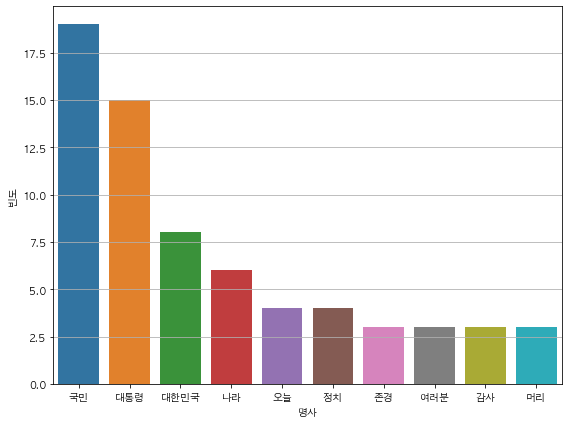

In [80]:
plt.figure(figsize = (8,6))
sns.barplot(x = '명사', y = '빈도', data = df_noun10)
plt.tight_layout()
plt.show()


#### 분석
* barplot을 그린 결과 국민 대한 언급이 가장 많았고 그 다음 대통령, 대한민국, 나라 순이었다.

### 3) 전처리된 데이터를 이용해 워드클라우드를 작성하고 인사이트를 추출하시오.

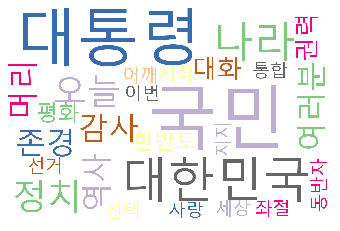

In [81]:
wordcloud = WordCloud(font_path = "./korean.ttf", background_color='white',colormap = "Accent_r",
                      width=1500, height=1000).generate_from_frequencies(wordDict)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#### 분석
* 텍스트 마이닝을 통해 추출된 단어들을 워드 클라우드로 제작한 결과, 위와 같은 결과를 찾을 수 있었으며  
  워드 클라우드를 통해서 민심에 대해 많은 언급을 했고(국민, 여러분, 동반자), 통일에 관한  
  문제(한반도, 평화)에 대해서 많은 생각을 가지고 연설을 했다고 판단할 수 있다.